In [1]:
from methods.subgradient import SubgradientDescent, Step
from methods.helpers import random_matrix, random_vector, proj_pos_orthant
import random
import numpy as np
import matplotlib.pyplot as plt


def f_i(x, Y_i, c_i, A_i, B_i):
    """
    Equation 1.2 of https://www.mit.edu/~dimitrib/Incr_2001.pdf
    """
    # print(np.shape(x))
    # print(np.shape(c_i))
    # print(np.shape(A_i))
    # print(np.shape(B_i))
    # print(np.shape(Y_i[0]))

    curr_best = -np.inf
    minimizer = Y_i[0]
    for y_i in Y_i:
        objective = np.dot((c_i + np.matmul(np.transpose(A_i), x)), y_i) - np.dot(B_i, x)
        curr_best = max(curr_best, objective)
        minimizer = y_i
    return (float(curr_best), minimizer)

def g_i(A_i, y_i):
    return np.matmul(A_i, y_i)

In [2]:
MAX_Y_SIZE = 10
M = 5 # Example for m = 5
n = 3
p = 2

c_1 = random_vector(p)
c_2 = random_vector(p)
c_3 = random_vector(p)
c_4 = random_vector(p)
c_5 = random_vector(p)

A_1 = random_matrix(n, p)
A_2 = random_matrix(n, p)
A_3 = random_matrix(n, p)
A_4 = random_matrix(n, p)
A_5 = random_matrix(n, p)

b = random_vector(n)
B = b / M

Y_1 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]
Y_2 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]
Y_3 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]
Y_4 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]
Y_5 = [random_vector(p) for _ in range(random.randint(1, MAX_Y_SIZE))]

def f(x):
    objective1, _ = f_i(x, Y_1, c_1, A_1, B)
    objective2, _ = f_i(x, Y_2, c_2, A_2, B)
    objective3, _ = f_i(x, Y_3, c_3, A_3, B)
    objective4, _ = f_i(x, Y_4, c_4, A_4, B)
    objective5, _ = f_i(x, Y_5, c_5, A_5, B)
    return objective1+objective2+objective3+objective4+objective5


print(Y_1, "\n", Y_2,"\n", Y_3,"\n", Y_4,"\n", Y_5)
# f_i((0, 0, 0), Y_1, c_1, A_1, B)


[array([0.43593106, 0.56484567]), array([0.82799091, 0.8810636 ]), array([0.93474586, 0.27698236]), array([0.85943162, 0.47802514]), array([0.03367368, 0.79846926]), array([0.90258932, 0.7900701 ]), array([0.9690744 , 0.69614908]), array([0.54042501, 0.3863    ])] 
 [array([0.60711796, 0.15503961]), array([0.06400519, 0.08866963]), array([0.43529644, 0.37483996]), array([0.32111574, 0.58646493]), array([0.88252667, 0.2971978 ]), array([0.47231094, 0.19657635])] 
 [array([0.10573172, 0.87374438]), array([0.8443885 , 0.06653351]), array([0.74832671, 0.62954036])] 
 [array([0.36219698, 0.11172044]), array([0.97091524, 0.51687308]), array([0.65528989, 0.11980951]), array([0.78181492, 0.29535593]), array([0.7351124 , 0.97412965]), array([0.25588812, 0.88968436]), array([0.80549604, 0.09909564]), array([0.58970034, 0.83982494]), array([0.27766214, 0.31064217])] 
 [array([0.75762593, 0.31657536]), array([0.67600788, 0.22743307]), array([0.82215806, 0.85777278]), array([0.4563471, 0.8394363]),

4.25372075121453 100


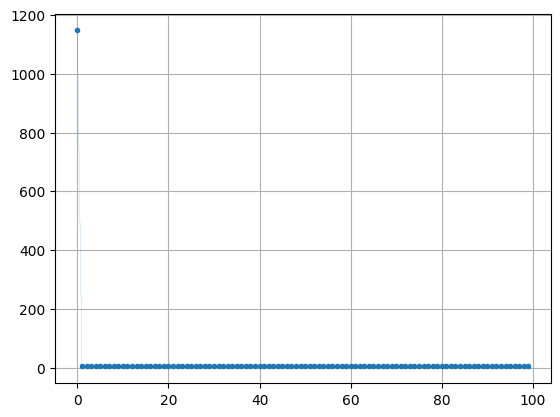

In [3]:
MAX_ITERATIONS = 100

# Original Subgradient Method
step_size = 0.1
curr_x = np.ones(n)
prev_x = np.zeros(n)
curr_best = np.inf
epsilon = 10**(-6)
iterations = 0
objectives = []

for i in range(MAX_ITERATIONS):
    iterations += 1
    prev_x = curr_x
    curr_f = f(curr_x)
    objectives.append(curr_f)
    curr_best = min(curr_best, curr_f)
    _, ymin_1 = f_i(curr_x, Y_1, c_1, A_1, B)
    _, ymin_2 = f_i(curr_x, Y_2, c_2, A_2, B)
    _, ymin_3 = f_i(curr_x, Y_3, c_3, A_3, B)
    _, ymin_4 = f_i(curr_x, Y_4, c_4, A_4, B)
    _, ymin_5 = f_i(curr_x, Y_5, c_5, A_5, B)
    g_1 = g_i(A_1, ymin_1)
    g_2 = g_i(A_2, ymin_2)
    g_3 = g_i(A_3, ymin_3)
    g_4 = g_i(A_4, ymin_4)
    g_5 = g_i(A_5, ymin_5)

    curr_x = proj_pos_orthant(curr_x-step_size*(g_1+g_2+g_3+g_4+g_5))
    # print(curr_x)

print(curr_best, iterations)
x = range(iterations)
y = objectives


plt.figure()
plt.plot(x, y, linewidth = 0.1, marker='.')
plt.grid()
plt.savefig("hello.png")